# Trigonometric Mods

In [1]:
'''
Dependency injection, some functional programming principles, and a modified version of the pattern made popular in Redux.
'''
'''
Import widgets directly
Set initial values based upon state
'''

from enum import Enum
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [2]:
class Prop(str, Enum):
    TRIG_FUNCTION = 'trig-function'
    PHASE_SHIFT = 'phase-shift'
    VERTICAL_SHIFT = 'vertical-shift'
    HORIZONTAL_SCALAR = 'horizontal-scalar'
    VERTICAL_SCALAR = 'vertical-scalar'


In [3]:
class Dispatcher:
    _actions = {}

    def add_action(self, event_name):
        def fn(action):
            if not event_name in self._actions:
                self._actions[event_name] = []
            self._actions[event_name].append(action)
            return self
        return fn

    def on(self, event_name):
        def fn(fnc):
            def gn(event):
                value = fnc(event)
                self.dispatch(event_name, value)
                return value
            return gn  
        return fn

    def dispatch(self, event_name, data):
        print(event_name)
        print(self._actions)
        for action in self._actions[event_name]:
            print(event_name, data)
            action(event_name, data, self)
        return self


def calculate_trig_function_value(x, vertical_scalar = 1, horizontal_scalar = 1, phase_shift = 0, vertical_shift = 0):
    return vertical_scalar * np.sin(horizontal_scalar * (x - phase_shift)) + vertical_shift

# Mutates state.
def update_state(state):
    def fn(prop, value, dispatcher):
        # if prop == Prop.PHASE_SHIFT:
            
        print('update state', prop, value)
        state.update({prop: value})


        dispatcher.dispatch('state_update', state)
        return state
    return fn

# Mutates the label widget.
def update_label(label):
    def fn(prop, value, _dispatcher):
        label.value = f"{value:.1f}"
        return {prop: value}
    return fn

# Mutates the wave plot.
def update_wave_plot(plot):
    def fn(theta):
        def gn(prop, value, _dispatcher):
            phase_shift = value[Prop.PHASE_SHIFT]
            vertical_shift = value['vertical_shift']
            horizontal_scalar = value['horizontal_scalar']
            vertical_scalar = value['vertical_scalar']

            y_unscaled = [calculate_trig_function_value(i) for i in theta]
            y_scaled = [calculate_trig_function_value(i, vertical_scalar, horizontal_scalar, phase_shift, vertical_shift) for i in theta]
            
            plot(theta, y_unscaled, 'k--')
            plot(theta, y_scaled, 'b')
            plot.show()
        return gn
    return fn


IndentationError: expected an indented block after 'if' statement on line 36 (1587085918.py, line 38)

In [ ]:
extract_event_value = lambda event : event['new']

# change to options
def define_slider(dispatcher, key, description, value=0, min=-5, max=5):
    label = widgets.Label(description)
    label.layout.width = '8rem'
    label_value = widgets.Label(f"{value:.1f}")
    label_value.layout.width = '3rem'
    label_value.layout.margin = '2px 0 0 1rem'
    label_value.layout.justify_content = 'flex-end'
    label_min = widgets.Label(f"{min:.1f}")
    label_min.style.text_color = 'gray'
    label_max = widgets.Label(f"{max:.1f}")
    label_max.style.text_color = 'gray'
    slider = widgets.FloatSlider(
        value=0,
        min=-5,
        max=5,
        step=0.1,
        orientation='horizontal',
        readout=False
    )

    # I didn't want the label to be notified on every state change, just the relevant.
    dispatcher.add_action(key)(update_label(label_value))
    slider.observe(dispatcher.on(key)(extract_event_value), names="value")

    slider_container = widgets.HBox([label_min, slider, label_max])
    slider_container.layout.justify_content = 'center'
    container = widgets.HBox([label, slider_container, label_value])
    container.layout.justify_content = 'space-between'

    return container


def define_ui_layout(state):
    children = [
        define_slider(state, 'phase-shift', 'Phase Shift'),
        define_slider(state, 'vertical-shift', 'Vertical Shift'),
        define_slider(state, 'horizontal-scalar', 'Horizontal Scalar'),
        define_slider(state, 'vertical-scalar', 'Vertical Scalar'),
    ]

    bottom_column = widgets.VBox(children=children)
    bottom_column.layout = widgets.Layout(
        padding='0.5rem',
        border='1px solid lightgray',
        width='fit-content'
    )

    toggle_buttons = widgets.ToggleButtons(options=["Sine", "Cosine"])
    toggle_buttons_layout = widgets.Layout(margin='0 0 1rem 0')
    toggle_buttons_container = widgets.Box(children=[toggle_buttons], layout=toggle_buttons_layout)

    layout = widgets.Layout(
        display='flex',
        flex_flow='column',
        align_items='stretch')
    main_container = widgets.Box(children=[toggle_buttons_container, bottom_column], layout=layout)

    return main_container


# def plot_sine(graph):
#     def fn(theta):
#         def gn(vertical_scalar = 1, horizontal_scalar = 1, phase_shift = 0, y_shift = 0):
#             y_unscaled = [calculate_trig_function_value(i) for i in theta]
#             y_scaled = [calculate_trig_function_value(i, vertical_scalar, horizontal_scalar, phase_shift, y_shift) for i in theta]
            
#             graph.plot(theta, y_unscaled, 'k--')
#             graph.plot(theta, y_scaled, 'b')
#             graph.show()
#         return gn
#     return fn

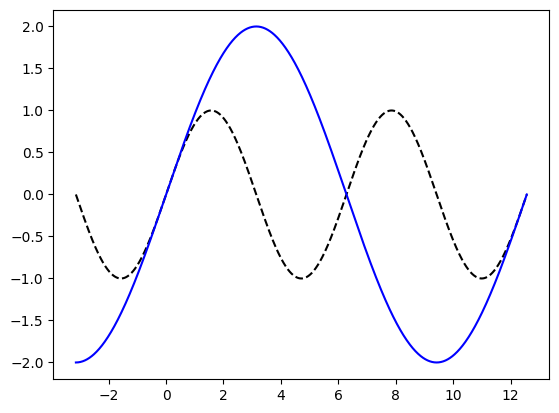

In [ ]:
theta = np.linspace(-np.pi, 4 * np.pi, 1000)
# plot_sine(plt)(theta)(2, 1/2)


In [ ]:


# wave_plot = WavePlot(plt)
# state.add_observer(wave_plot)

# subject = Subject()
dispatcher = Dispatcher()
state = {
    'phase-shift': 0,
    'vertical_shift': 0,
    'horizontal_shift': 0,
    'vertical_shift': 0,
}

dispatcher.add_action('phase-shift')(update_state(state))
dispatcher.add_action('state_update')(update_wave_plot(plt)(theta))


ui = define_ui_layout(dispatcher)
# ui = define_ui_layout(update_state(dispatcher))
print(dispatcher._actions)




ui

{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}


Box(children=(Box(children=(ToggleButtons(options=('Sine', 'Cosine'), value='Sine'),), layout=Layout(margin='0…

phase-shift
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
phase-shift 0.09999999999999964
update state phase-shift 0.09999999999999964
state_update
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
state_

KeyError: 'horizontal_scalar'

phase-shift
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
phase-shift 0.9000000000000004
update state phase-shift 0.9000000000000004
state_update
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
state_up

KeyError: 'horizontal_scalar'

phase-shift
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
phase-shift 1.2999999999999998
update state phase-shift 1.2999999999999998
state_update
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
state_up

KeyError: 'horizontal_scalar'

phase-shift
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
phase-shift 1.7000000000000002
update state phase-shift 1.7000000000000002
state_update
{'phase-shift': [<function update_state.<locals>.fn at 0x750380191c60>, <function update_label.<locals>.fn at 0x750380192fc0>], 'state_update': [<function update_wave_plot.<locals>.fn.<locals>.gn at 0x750380191bc0>], 'vertical-shift': [<function update_label.<locals>.fn at 0x750380000360>], 'horizontal-scalar': [<function update_label.<locals>.fn at 0x7503800016c0>], 'vertical-scalar': [<function update_label.<locals>.fn at 0x750380002a20>]}
state_up

KeyError: 'horizontal_scalar'